# Access to Special Healthcare Services Among Children

**Overview**: This capstone project mainly focuses on the Children special health care services and utilizing the data from the National Survey of Children’s Health (NSCH). NSCH provides rich data on multiple, intersecting aspects of children’s lives—including physical and mental health, access to and quality of health care, and the child’s family, neighborhood, school, and social context. The National Survey of Children's Health is funded and directed by the Health Resources and Services Administration (HRSA) Maternal and Child Health Bureau (MCHB). A revised version of the survey was conducted as a mail and web-based survey by the Census Bureau in 2016, 2017, 2018, 2019, 2020, 2021 and 2022. Among other changes, the 2016 National Survey of Children’s Health started integrating two surveys: the previous NSCH and theNational Survey of Children with Special Health Care Needs (NS-CSHCN). See the MCHB website for more information on the 2016, 2017, 2018, 2019, 2020, 2021 and 2022 National Survey of Children's Health administration, methodology, survey content, and data availability. 

**Data Source and Methods**: The 2016 NSCH is a nationally representative survey containing rich data on over 50,000 children’s health and wellbeing. The survey captures critical information reported by parents on children with special needs, chronic conditions, public insurance coverage, and access barriers to treatment services. Both descriptive and multivariate methods will be utilized to provide a comprehensive analysis of access inequities. Data Source - National Survey of Children’s Health, Health Resources and Services Administration, Maternal and Child Health Bureau. [here](https://mchb.hrsa.gov/data/national-surveys)



### Understanding the Data

The NSCH uses the CSHCN Screener to identify children with special health care needs. The Screener is a five item, parent-reported tool designed to reflect the federal Maternal and Child Health Bureau’s consequences-based definition of children with special health care needs. It identifies children across the range and diversity of childhood chronic conditions and special needs, allowing a more comprehensive and robust assessment of children's needs and health care system performance than is attainable by focusing on a single diagnosis or type of special need. All three parts of at least one screener question (or in the case of question 5, the two parts) must be answered “YES” in order for a child to meet CSHCN Screener criteria for having a special health care need.

More details are present on the codebooks provided

### Read in the Data

Use pandas to read in the dataset `data.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import time
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,HHID,FIPSST,STRATUM,FORMTYPE,TOTKIDS_R,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,MOMAGE,LIVEUSA_YR,...,mhealth,qualnum,CSHCN,CSHCNtype,CSHCNComplex,CSHCNComplex2,mhneeds,mhneeds2,race,CURRINS
0,16000030,18,1,1,1,1,2,1,28,95,...,2,0,2,0,3,3,3,3,2,1
1,16000032,17,1,2,1,1,9,1,40,95,...,1,4,1,4,1,1,1,1,2,1
2,16000050,50,1,2,1,1,11,1,28,95,...,2,0,2,0,3,3,3,3,2,1
3,16000051,51,1,2,3,1,10,2,37,95,...,2,0,2,0,3,3,3,3,2,1
4,16000090,53,1,3,1,1,15,2,30,95,...,2,0,2,0,3,3,3,3,2,99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50212 entries, 0 to 50211
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HHID           50212 non-null  int64
 1   FIPSST         50212 non-null  int64
 2   STRATUM        50212 non-null  int64
 3   FORMTYPE       50212 non-null  int64
 4   TOTKIDS_R      50212 non-null  int64
 5   HHLANGUAGE     50212 non-null  int64
 6   SC_AGE_YEARS   50212 non-null  int64
 7   SC_SEX         50212 non-null  int64
 8   MOMAGE         50212 non-null  int64
 9   LIVEUSA_YR     50212 non-null  int64
 10  LIVEUSA_MO     50212 non-null  int64
 11  HHCOUNT        50212 non-null  int64
 12  FAMCOUNT       50212 non-null  int64
 13  SC_CSHCN       50212 non-null  int64
 14  SC_K2Q10       50212 non-null  int64
 15  SC_K2Q11       50212 non-null  int64
 16  SC_K2Q12       50212 non-null  int64
 17  SC_K2Q13       50212 non-null  int64
 18  SC_K2Q14       50212 non-null  int64
 19  SC_K

### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

HHID - Unique HH ID 

FIPSST - State FIPS Code  

STRATUM	- Sampling Stratum  

FORMTYPE - 	Form Type  

TOTKIDS_R -	Number of Children  

HHLANGUAGE - Primary HH Language  

SC_AGE_YEARS -	Age of Selected Child - In Years  

SC_SEX	- Sex of Selected Child  

MOMAGE	- Age of Mother - Years  

LIVEUSA_YR	- How Long Living in the United States - Years 

LIVEUSA_MO	- How Long Living in the United States - Months  

HHCOUNT	- Number of People Living at Address   

FAMCOUNT	-	Number of People That Are Family Members  

SC_CSHCN - Special Health Care Needs Status of Selected Child  

SC_K2Q10 - SC Medication Currently  

SC_K2Q11 - SC Medication Currently Condition  

SC_K2Q12 - SC Medication Currently 12 Months  

SC_K2Q13 - SC Medical Care Currently  

SC_K2Q14 - SC Medical Care Currently Condition  

SC_K2Q15 - SC Medical Care Currently 12 Months 


SC_K2Q16 - SC Limited Ability Currently 

SC_K2Q17 - SC Limited Ability Currently Condition  

SC_K2Q18 - SC Limited Ability Currently 12 Months  

SC_K2Q19 - SC Special Therapy Currently  

SC_K2Q20 - SC Special Therapy Currently Condition  

SC_K2Q21 - SC Special Therapy Currently 12 Months 

SC_K2Q22 - SC Emotion Develop Behave Treatment 

SC_K2Q23 - SC Emotion Develop Behave 12 Months 

YEAR - Survey Year  

rxmeds	- Children qualifying on the CSHCN Screener prescription medication criteria - 1 - Yes, 2 - No

serve	-	Children qualifying on the CSHCN Screener for elevated use of services criteria  - 1 - Yes, 2 - No

func	-	Children qualifying on the CSHCN Screener functional limitations criteria  - 1 - Yes, 2 - No

therapy	-	Children qualifying on the CSHCN Screener specialized therapy criteria  - 1 - Yes, 2 - No

mhealth	-	Qualified on ongoing emotional, developmental or behavioral conditions  - 1 - Yes, 2 - No

qualnum	-	Number of qualifying CSHCN Screener answers - 0 - Non CSHCN. rest means Kid requires need 

CSHCN -		Indicator 1.11: Children with special health care needs  

CSHCNtype -		Children with specific types of special health care needs based on CSHCN screening criteria  - 0 Non-CSHCN, 1 - Functional Limitations, 2 - Prescription medication, 3 - specialized services/routine services , 4 - prescription medication and services

CSHCNComplex -	CSHCN status and complexity of health care needs  
mhneeds	- CSHCN with and without ongoing emotional, developmental and/or behavioral health special needs  - 1 - Yes, 2 - No , 3 - Non-CSHCN

race - Race/ethnicity categories - 7 categories, 1- Hispanic, 2 - White, non-Hispanc, 3 - Black, non-Hispanic, 4 - Asian, non-Hispanic, 5 - Amercian Indian/Alaska Native Non-Hispanic, 6 - Native Hawaiian and other pacific Islander Non-Hispanic , 7 - Multi-Race Non-Hispanic

CURRINS - Health Insurance Coverage - Currently Covered - 1 - Currently Insured, 2 - Currently uninsured, 99 - Missing



In [5]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Check and print the results
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("######################################")
    print("No missing values in the dataset")
    print("######################################")
else:
    print("######################################")
    print("Columns with missing values:")
    print(missing_columns)
    print("######################################")

# Get the non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])
print("\n")
print("######################################")
print("Non numeric columns in dataset" , len(non_numeric_columns.columns) , "non-numeric columns")
print("######################################")

print("\n")
# Describing the data
print("########################  Describing the data ###########################")
print(df.describe().T)
print("#########################################################################")

print("\n")
print("########################  Removing the duplicate columns - 'CSHCN', 'mhneeds2', 'CSHCNComplex2' ###########################")
print((df['CSHCN'] == df['SC_CSHCN']).value_counts())
print((df['mhneeds'] == df['mhneeds2']).value_counts())
print((df['CSHCNComplex'] == df['CSHCNComplex2']).value_counts())

# Dropping year as this YEAR has only 2016

columns_to_drop = ['CSHCN', 'mhneeds2', 'CSHCNComplex2', 'YEAR']  

df = df.drop(columns=columns_to_drop)

print("####################################################################################################################")



######################################
No missing values in the dataset
######################################


######################################
Non numeric columns in dataset 0 non-numeric columns
######################################


########################  Describing the data ###########################
                 count          mean            std         min          25%  \
HHID           50212.0  1.618229e+07  105557.170928  16000030.0  16090698.75   
FIPSST         50212.0  2.932010e+01      15.557428         1.0        17.00   
STRATUM        50212.0  1.063531e+00       0.243917         1.0         1.00   
FORMTYPE       50212.0  2.123755e+00       0.828110         1.0         1.00   
TOTKIDS_R      50212.0  1.828029e+00       0.857449         1.0         1.00   
HHLANGUAGE     50212.0  1.833367e+00       8.460653         1.0         1.00   
SC_AGE_YEARS   50212.0  9.397495e+00       5.273567         0.0         5.00   
SC_SEX         50212.0  1.487513e+00    

In [6]:
print("\n")
# Understanding if there is any imbalance in the target variable
print("##########################  Class Imbalance of Target variable  ############################")
print(df['SC_CSHCN'].value_counts() ,  '  And the ratio is  ' , (df['SC_CSHCN'] == 1).sum()/(df['SC_CSHCN'] == 2).sum())
print("#############################################################################################")



##########################  Class Imbalance of Target variable  ############################
2    38820
1    11392
Name: SC_CSHCN, dtype: int64   And the ratio is   0.293456980937661
#############################################################################################


#### Target Variable: SC_CSHCN (Indicator of whether child has special healthcare needs)

##### Use Cases:

Predict the likelihood of children having special healthcare needs (SC_CSHCN) based on demographic factors



Shape before deleting the duplicates from dataset (50212, 39)
Shape after deleting the duplicates from dataset (50212, 39)


################## Correlation of the matrix ####################


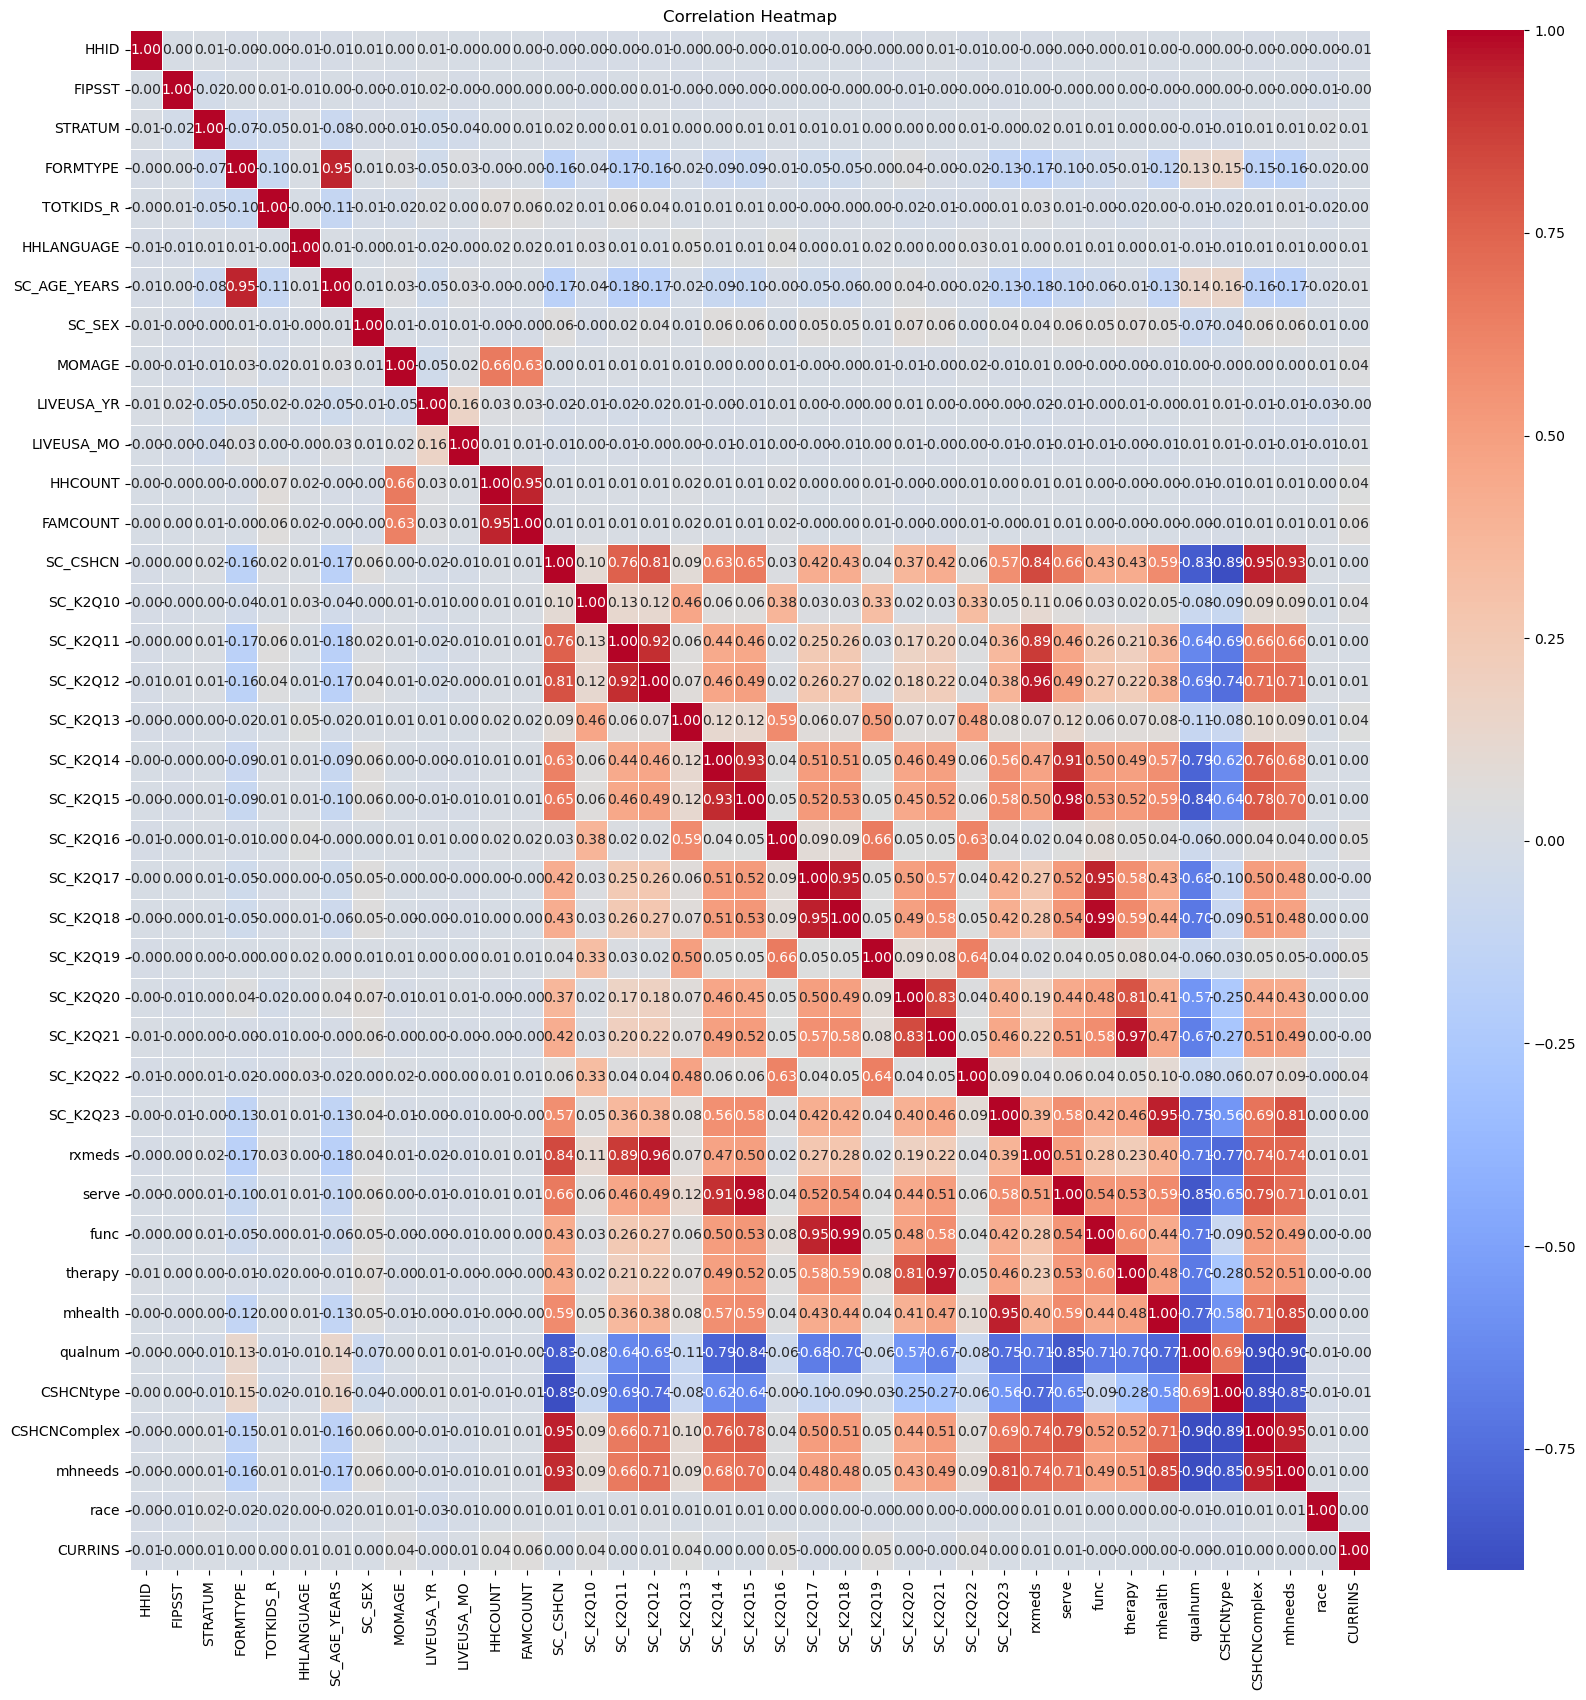

In [7]:
print("Shape before deleting the duplicates from dataset", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after deleting the duplicates from dataset", df.shape)

print("\n")
print("################## Correlation of the matrix ####################")
cormat=df.corr(numeric_only=True)
# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(cormat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

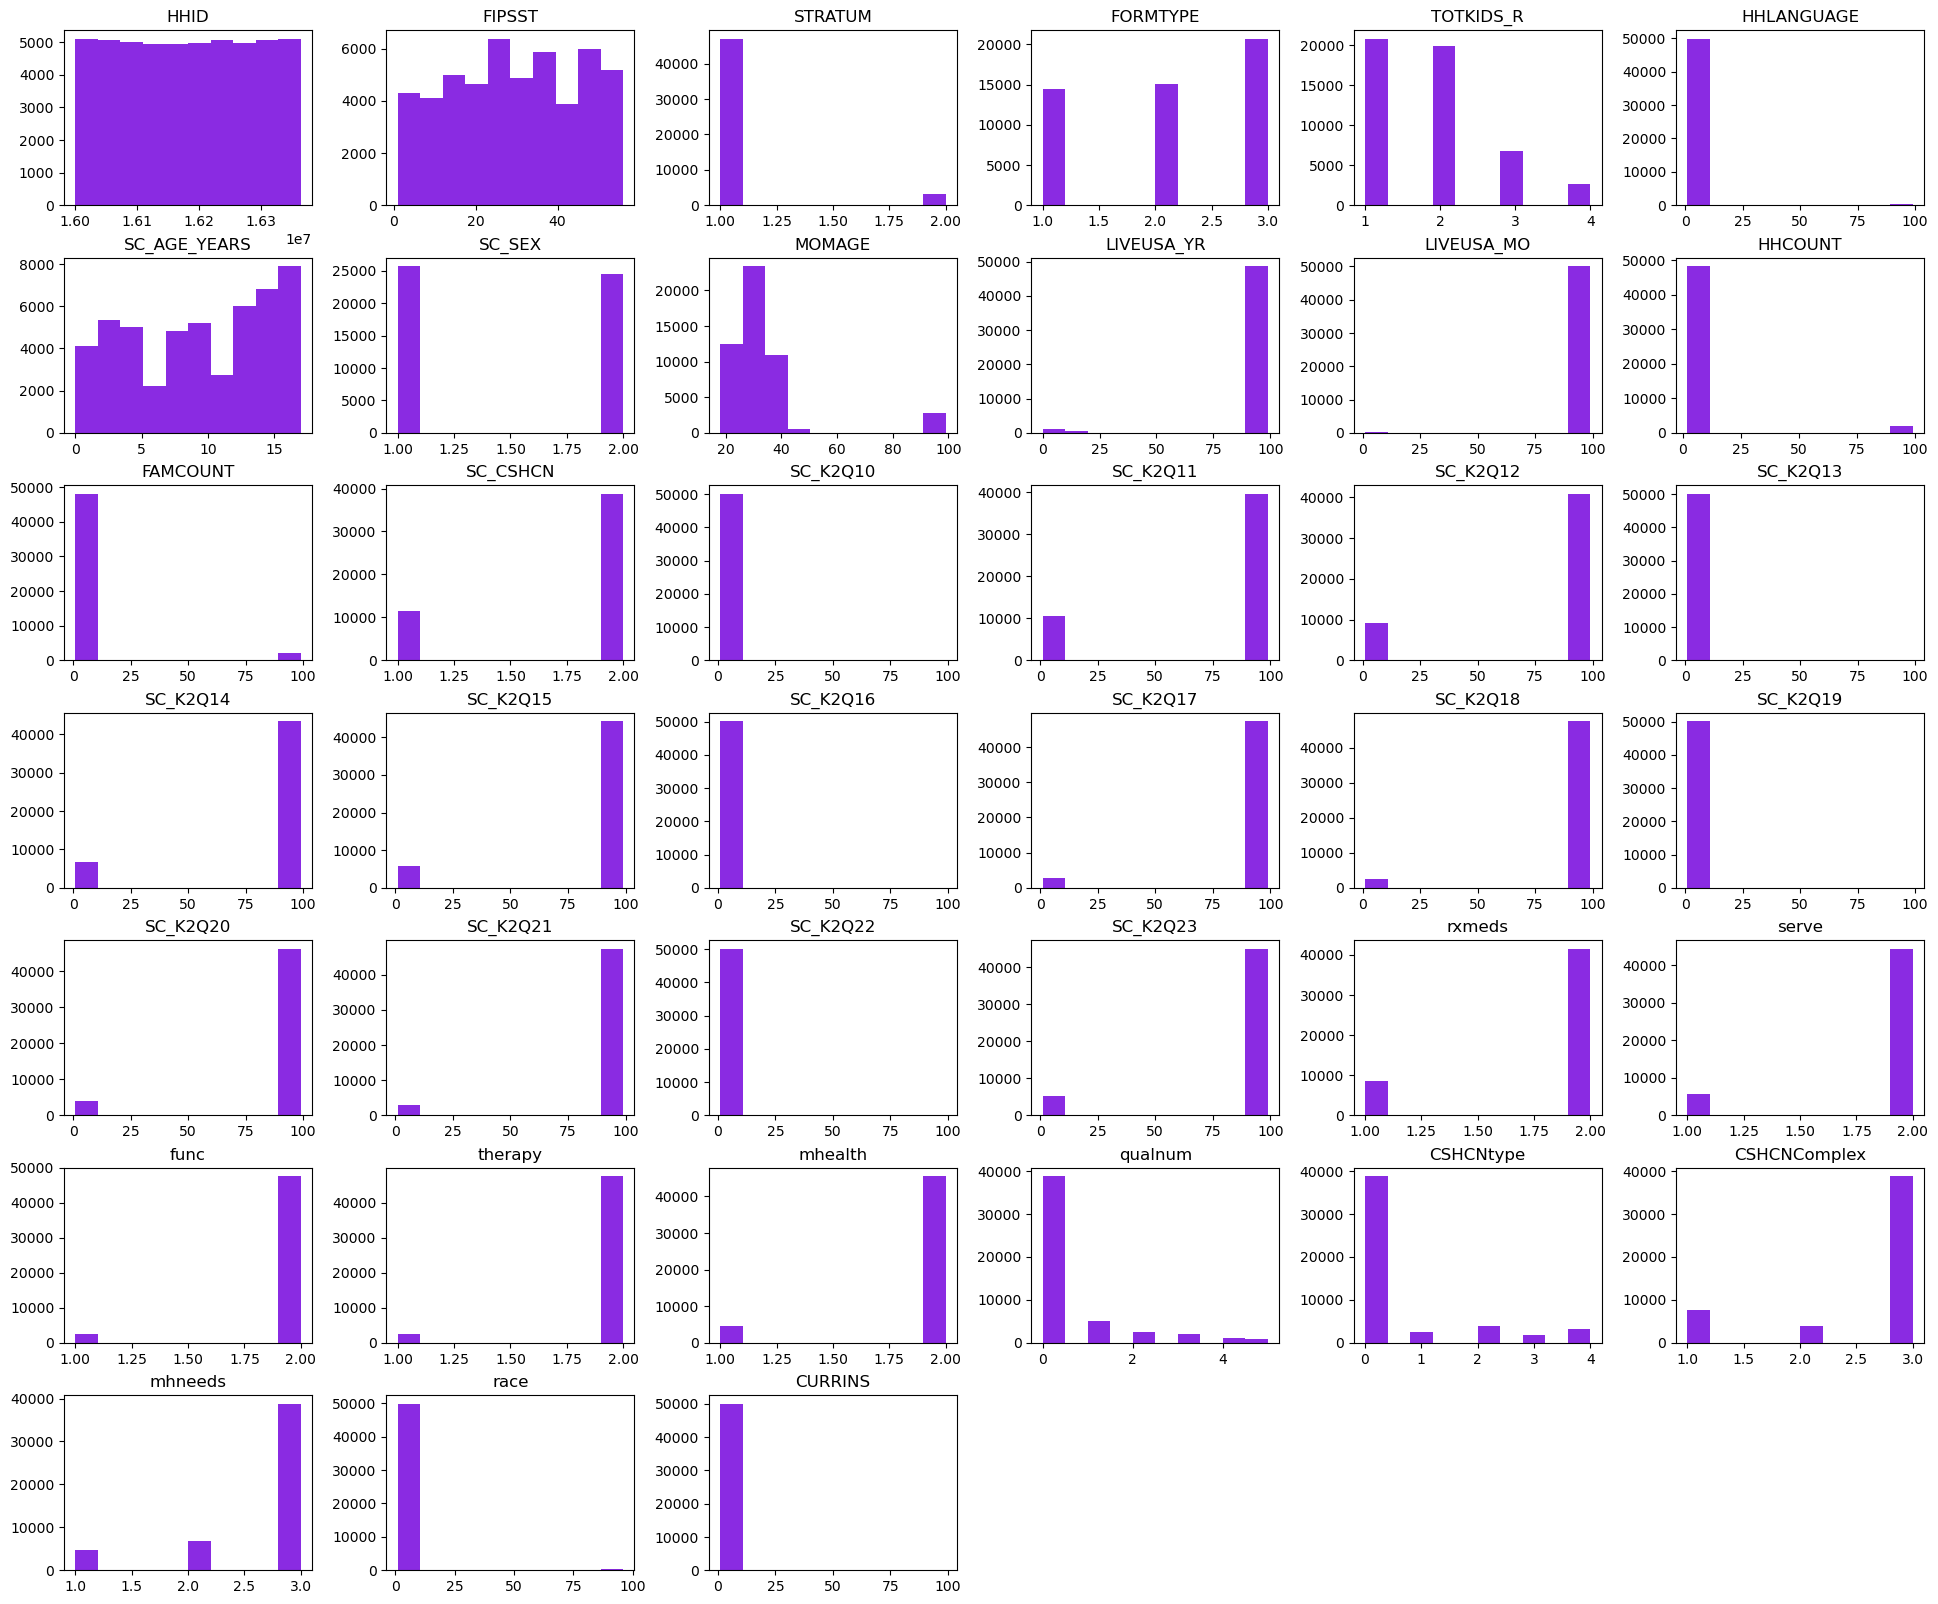

In [10]:
## Want to determine which features are dependent mainly on the prediction 

# Ploting histogram to check that if data columns are normal or almost normal or not
df.hist(figsize=(24,20),color="blueviolet",grid=False)
plt.show()

### Understanding the relation of features with the target variable 'SC_CSHCN'

#### 1 -  Child needs/undergoing special needs , 2 - Child does not need any needs

In [11]:
class UnderstandingData:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("SC_CSHCN")
        self.class_name_no = 2
        self.class_name_yes = 1
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

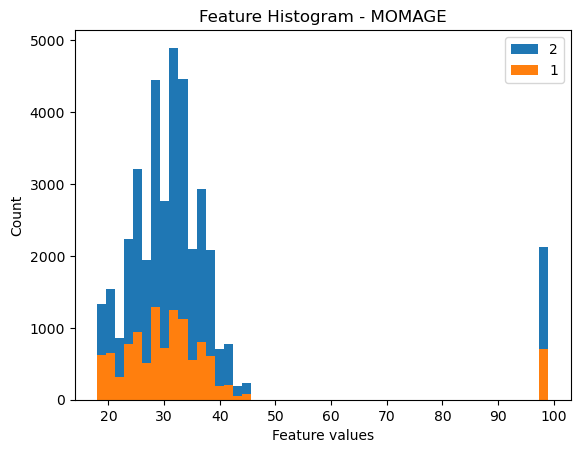

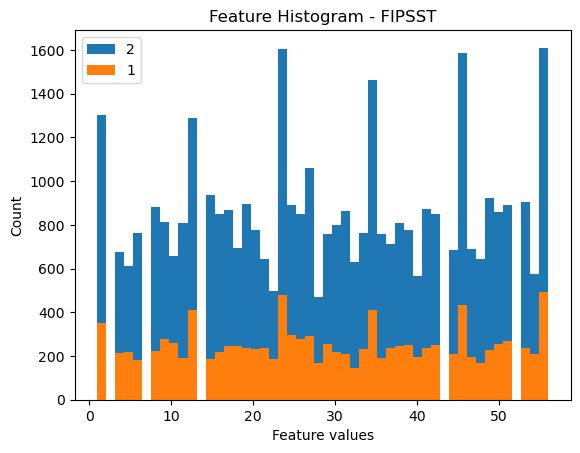

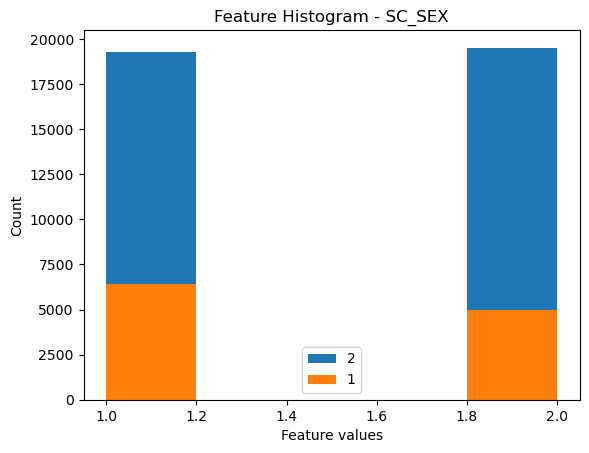

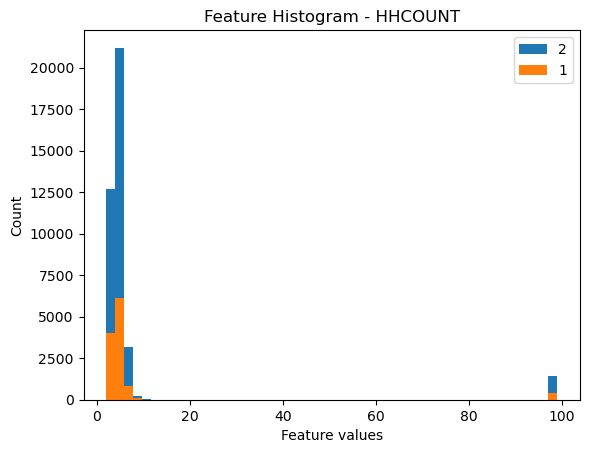

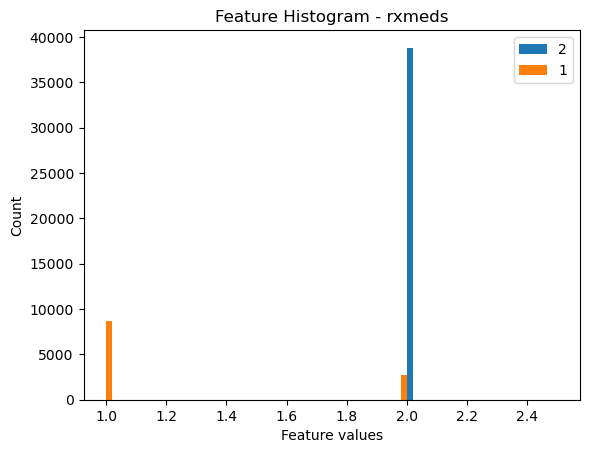

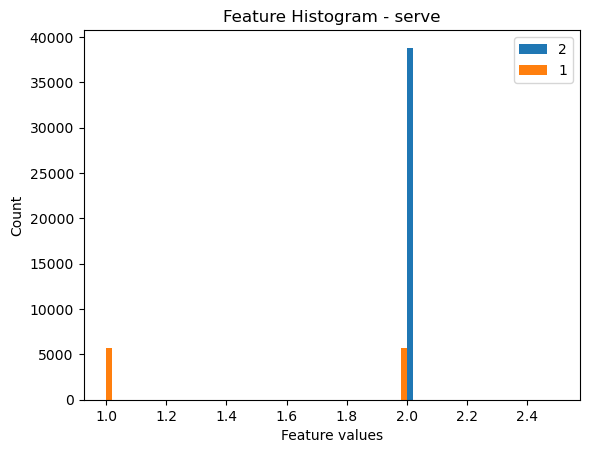

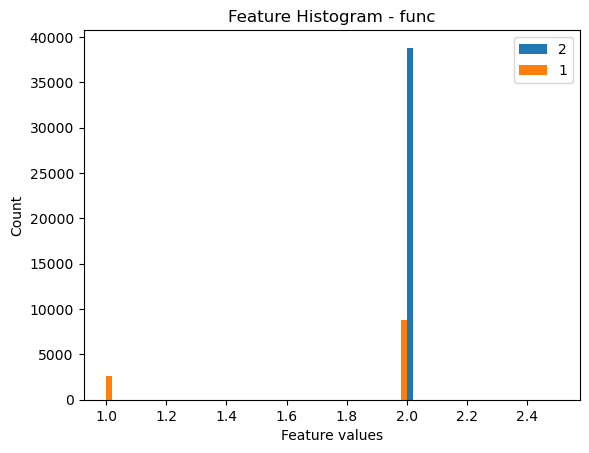

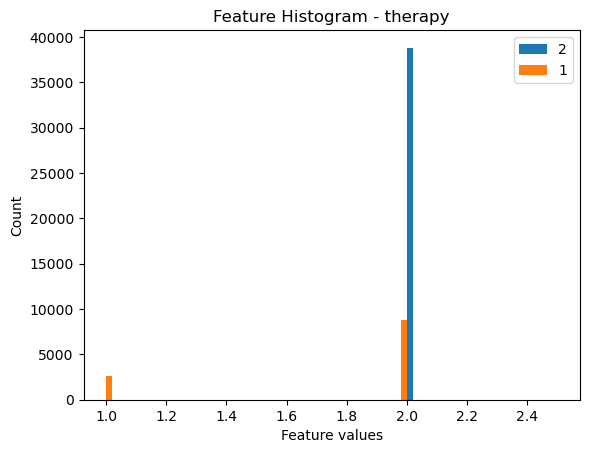

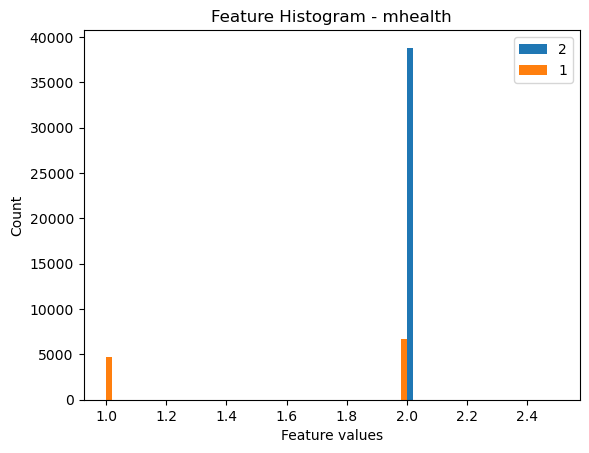

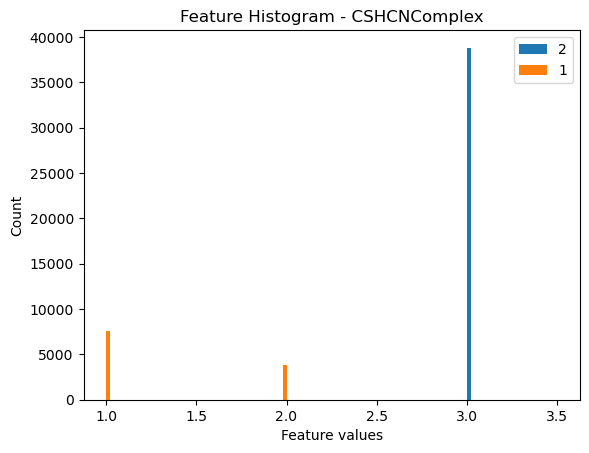

In [12]:
understanding_data = UnderstandingData(df)

### Feature - MOMAGE
understanding_data.plot_histogram_continuous("MOMAGE", 50)

### Feature - FIPSST
understanding_data.plot_histogram_continuous("FIPSST", 50)

### Feature - SEX
understanding_data.plot_histogram_continuous("SC_SEX", 5)

### Feature - HHCOUNT
understanding_data.plot_histogram_continuous("HHCOUNT", 50)

### Feature - RXMEDS
understanding_data.plot_histogram_continuous("rxmeds", 50)

### Feature - serve
understanding_data.plot_histogram_continuous("serve", 50)

### Feature - func
understanding_data.plot_histogram_continuous("func", 50)

### Feature - therapy
understanding_data.plot_histogram_continuous("therapy", 50)

### Feature - mhealth
understanding_data.plot_histogram_continuous("mhealth", 50)

### Feature - serve
understanding_data.plot_histogram_continuous("CSHCNComplex", 50)


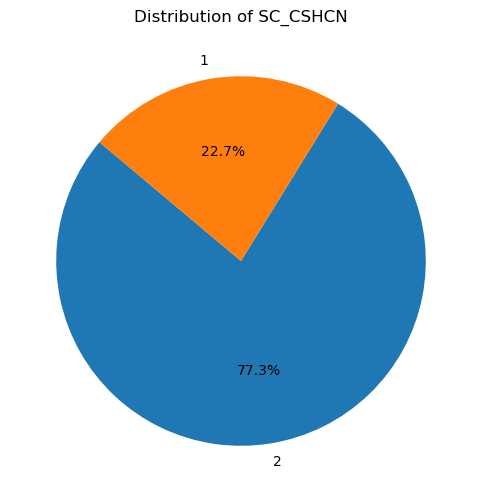

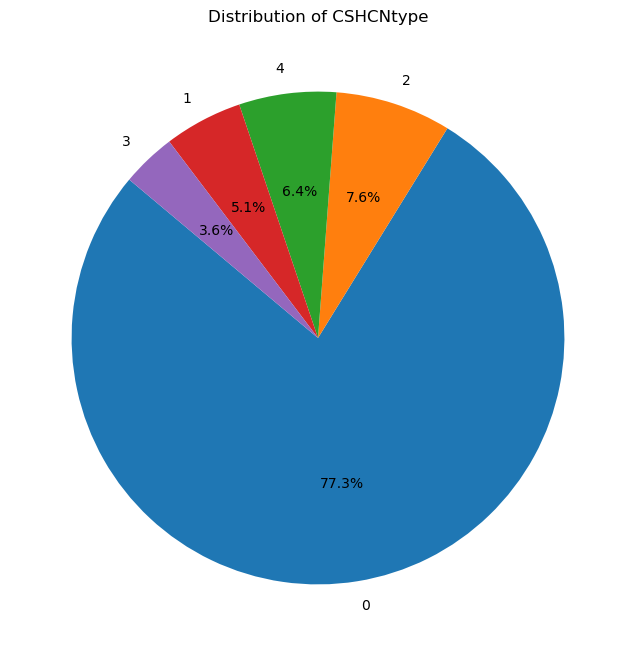

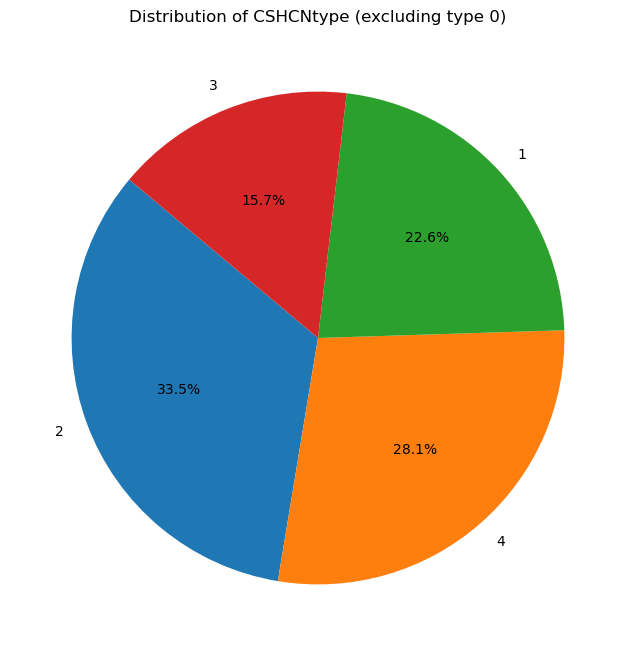

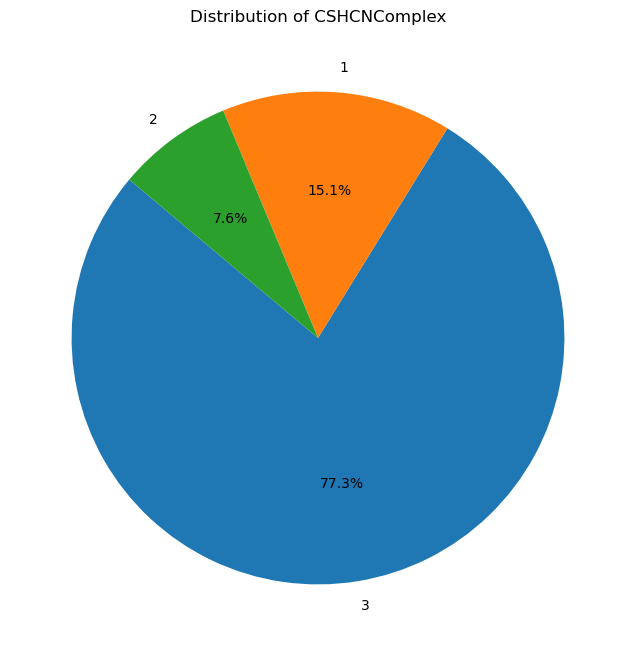

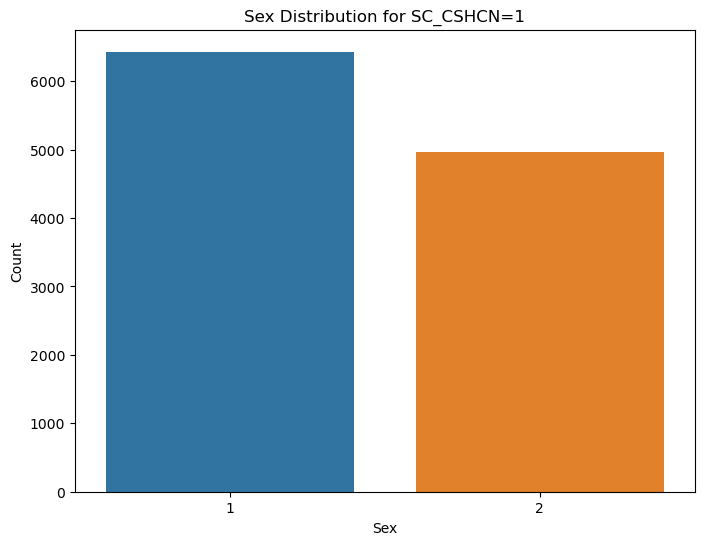

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of 'SC_CSHCN'
sc_cshcn_counts = df['SC_CSHCN'].value_counts()

# Plot a pie chart for 'SC_CSHCN'
plt.figure(figsize=(6, 6))
plt.pie(sc_cshcn_counts, labels=sc_cshcn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of SC_CSHCN')
plt.show()

# Count the occurrences of 'CSHCNtype'
cshcn_type_counts = df['CSHCNtype'].value_counts()

# Plot a pie chart for 'CSHCNtype'
plt.figure(figsize=(8, 8))
plt.pie(cshcn_type_counts, labels=cshcn_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of CSHCNtype')
plt.show()

# Exclude rows where 'CSHCNtype' is not '0'
filtered_df = df[df['CSHCNtype'] != 0]

# Count the occurrences of 'CSHCNtype'
cshcn_type_counts = filtered_df['CSHCNtype'].value_counts()


# Plot a pie chart for 'CSHCNtype'
plt.figure(figsize=(8, 8))
plt.pie(cshcn_type_counts, labels=cshcn_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of CSHCNtype (excluding type 0)')
plt.show()

# Count the occurrences of 'CSHCNComplex'
cshcn_complex_counts = df['CSHCNComplex'].value_counts()

# Plot a pie chart for 'CSHCNComplex'
plt.figure(figsize=(8, 8))
plt.pie(cshcn_complex_counts, labels=cshcn_complex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of CSHCNComplex')
plt.show()


# Create a count plot to show sex distribution when SC_CSHCN=1, 1 for Male and 2 for females
affected_children_df = df[df['SC_CSHCN'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(x='SC_SEX', data=affected_children_df)
plt.title('Sex Distribution for SC_CSHCN=1')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


### Observations from all the above graphs

1. Among the entire dataset, it is evident that only 22.7% of children require special needs, while the majority do not necessitate such support.

2. Among the children with identified needs, the predominant sources of assistance are prescribed medications, followed by medication services, functional limitations, and specialized services.

3. The graphs clearly indicate that the majority of affected children are boys when compared to girls.

4. It is expected that all values in columns labeled SC_K* should be either 1 or 2. However, some columns exhibit values like 95, indicating potential missing data in those columns. Additionally, an investigation is warranted to identify any outliers present in the dataset.

In [9]:
# Check the count of 95 in each column
count_95_per_column = df.eq(95).sum()

# Display the results
print(count_95_per_column)
print(df.shape)

HHID                0
FIPSST              0
STRATUM             0
FORMTYPE            0
TOTKIDS_R           0
HHLANGUAGE          0
SC_AGE_YEARS        0
SC_SEX              0
MOMAGE              0
LIVEUSA_YR      48295
LIVEUSA_MO      48295
HHCOUNT             0
FAMCOUNT            0
SC_CSHCN            0
SC_K2Q10            0
SC_K2Q11        39489
SC_K2Q12        40698
SC_K2Q13            0
SC_K2Q14        43393
SC_K2Q15        44204
SC_K2Q16            0
SC_K2Q17        47254
SC_K2Q18        47475
SC_K2Q19            0
SC_K2Q20        46194
SC_K2Q21        47325
SC_K2Q22            0
SC_K2Q23        45011
rxmeds              0
serve               0
func                0
therapy             0
mhealth             0
qualnum             0
CSHCNtype           0
CSHCNComplex        0
mhneeds             0
race                0
CURRINS             0
dtype: int64
(50212, 39)


### Next steps in Filterng data or addressing the missing values.

1. LIVEUSA_YR and LIVEUSA_MO -> Out of 50212 , 48295 rows are having missing data, hence deleting those columns.
2. SC_K2Q10, SC_K2Q11, SC_K2Q12 are all talking about SC Medical care, SC_K2Q10 is handlingthe current situation, hence keeping that column and deleting the other columns.
3. Following the above pattern for the other SC_K2Q* columns
4. Dropping the columns HHID, FIPSST, STRATUM,  FORMTYPE as their are ID's and not affecting the outcome of the target variable
5. Dropping coplumns like serve, mhneeds and more as they are derived columns based on SC_K2* and not needed

In [10]:
columns_to_drop_second_iteration = ['HHID', 'FIPSST', 'STRATUM',  'FORMTYPE', 'LIVEUSA_YR', 'LIVEUSA_MO', 'SC_K2Q11', 'SC_K2Q12', 'SC_K2Q14', 'SC_K2Q15', 'SC_K2Q17', 'SC_K2Q18', 'SC_K2Q20', 'SC_K2Q21', 'SC_K2Q23', 'rxmeds', 'serve', 'func', 'therapy', 'mhealth', 'qualnum','mhneeds']  

df = df.drop(columns=columns_to_drop_second_iteration)

print(df.shape)


(50212, 17)


No columns have a count of 95.


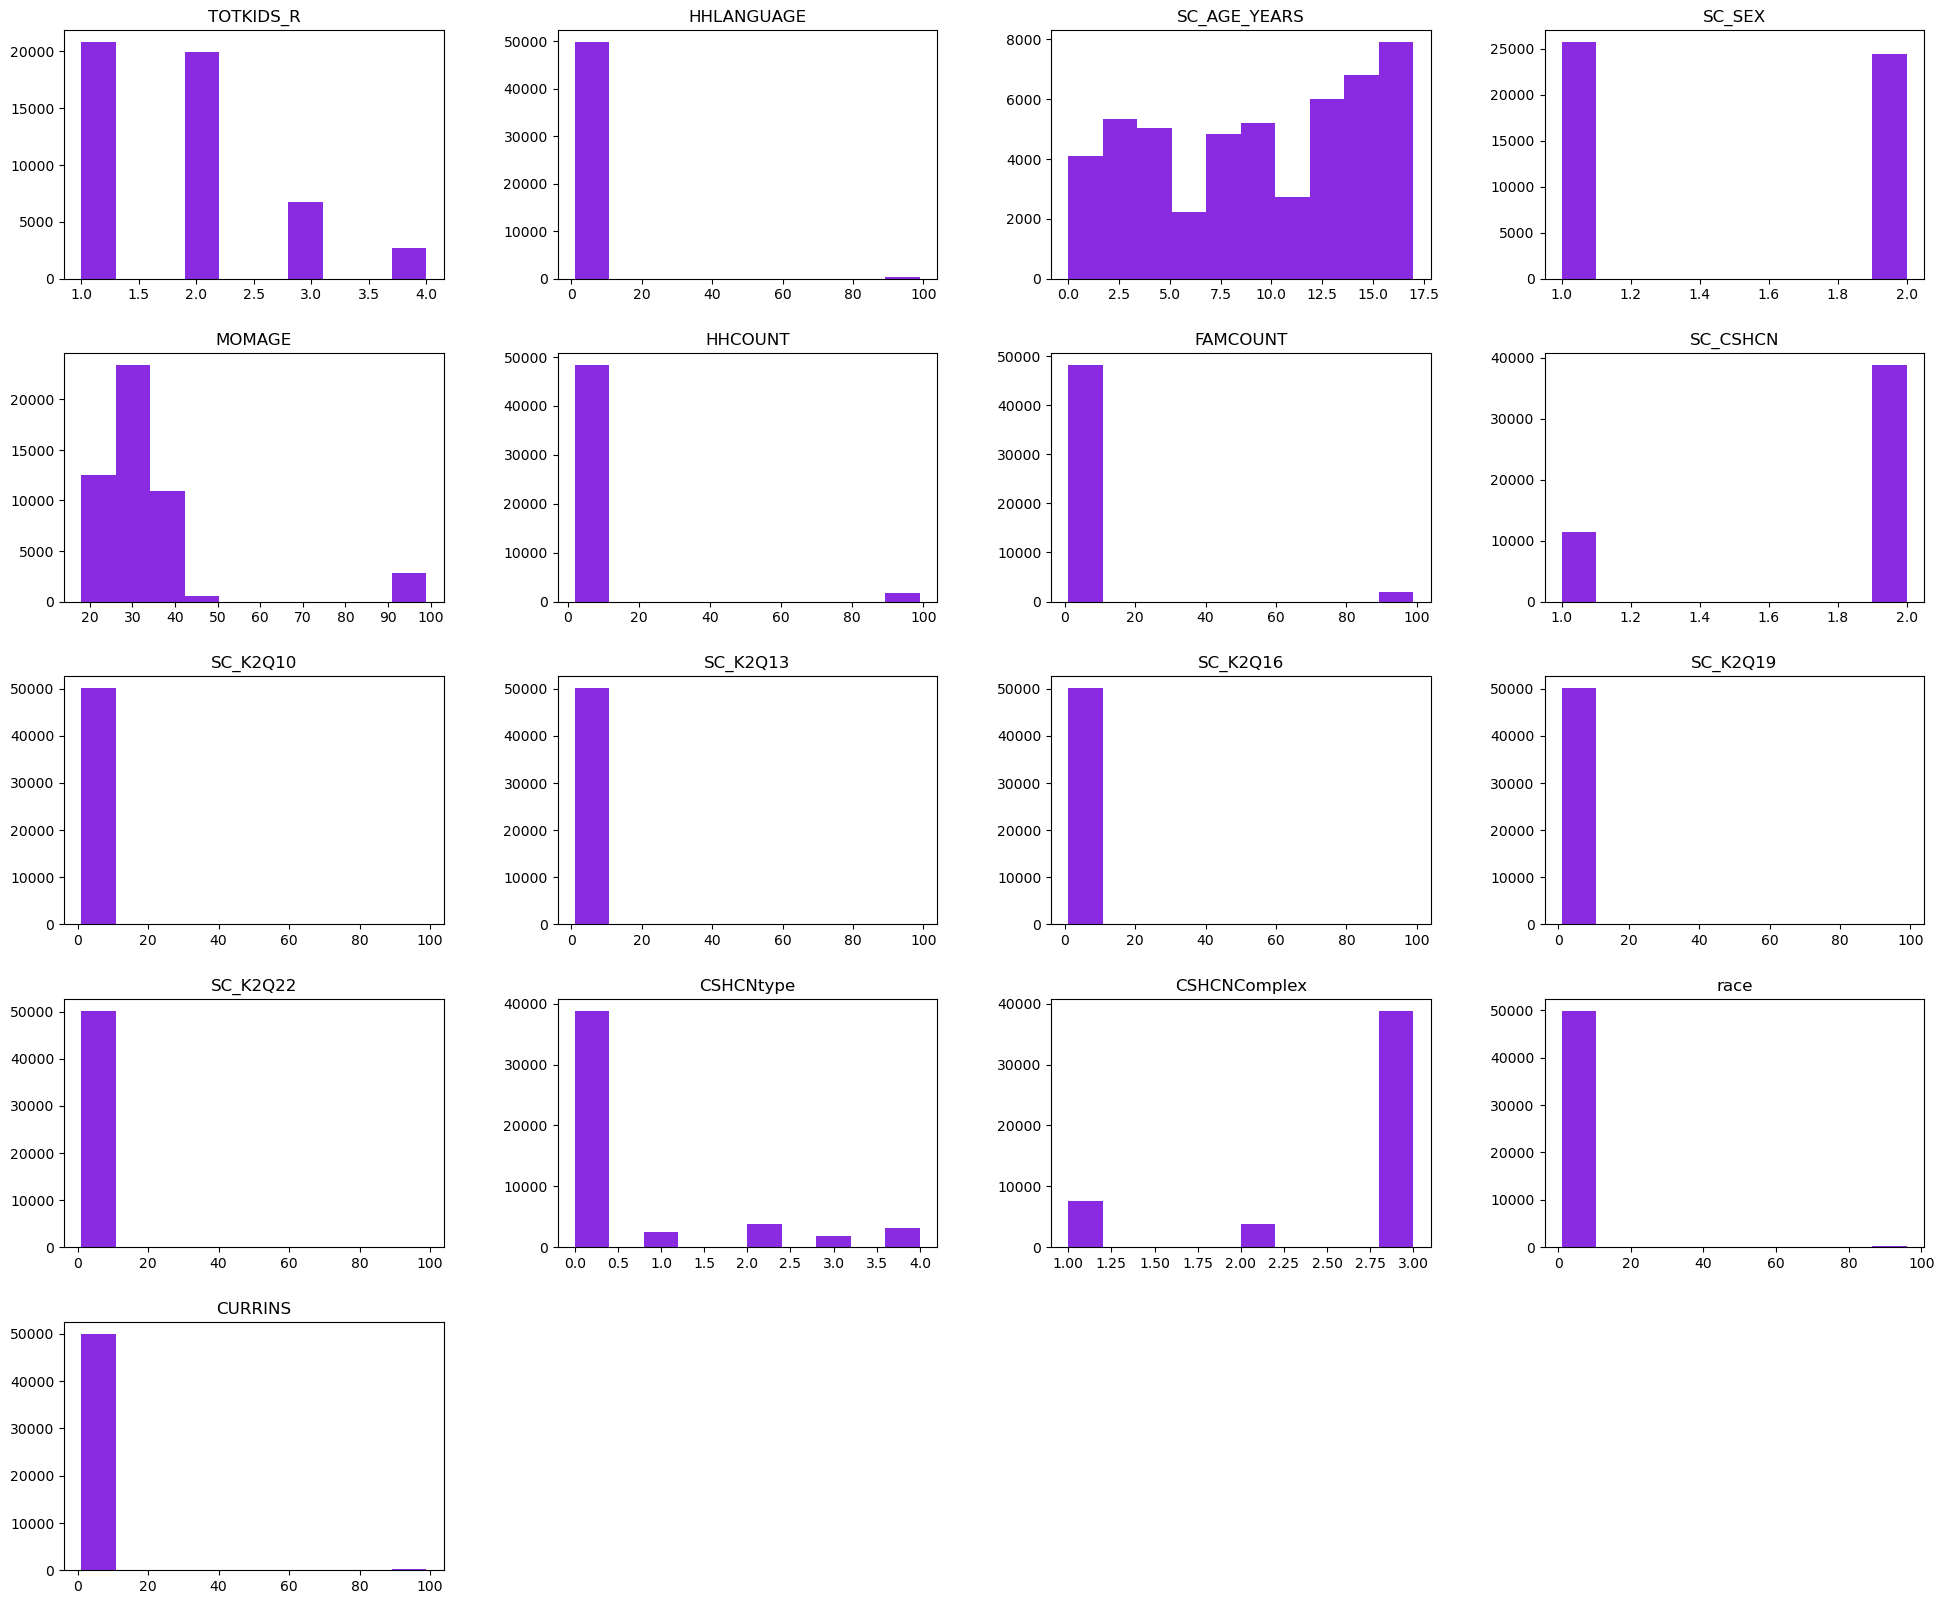

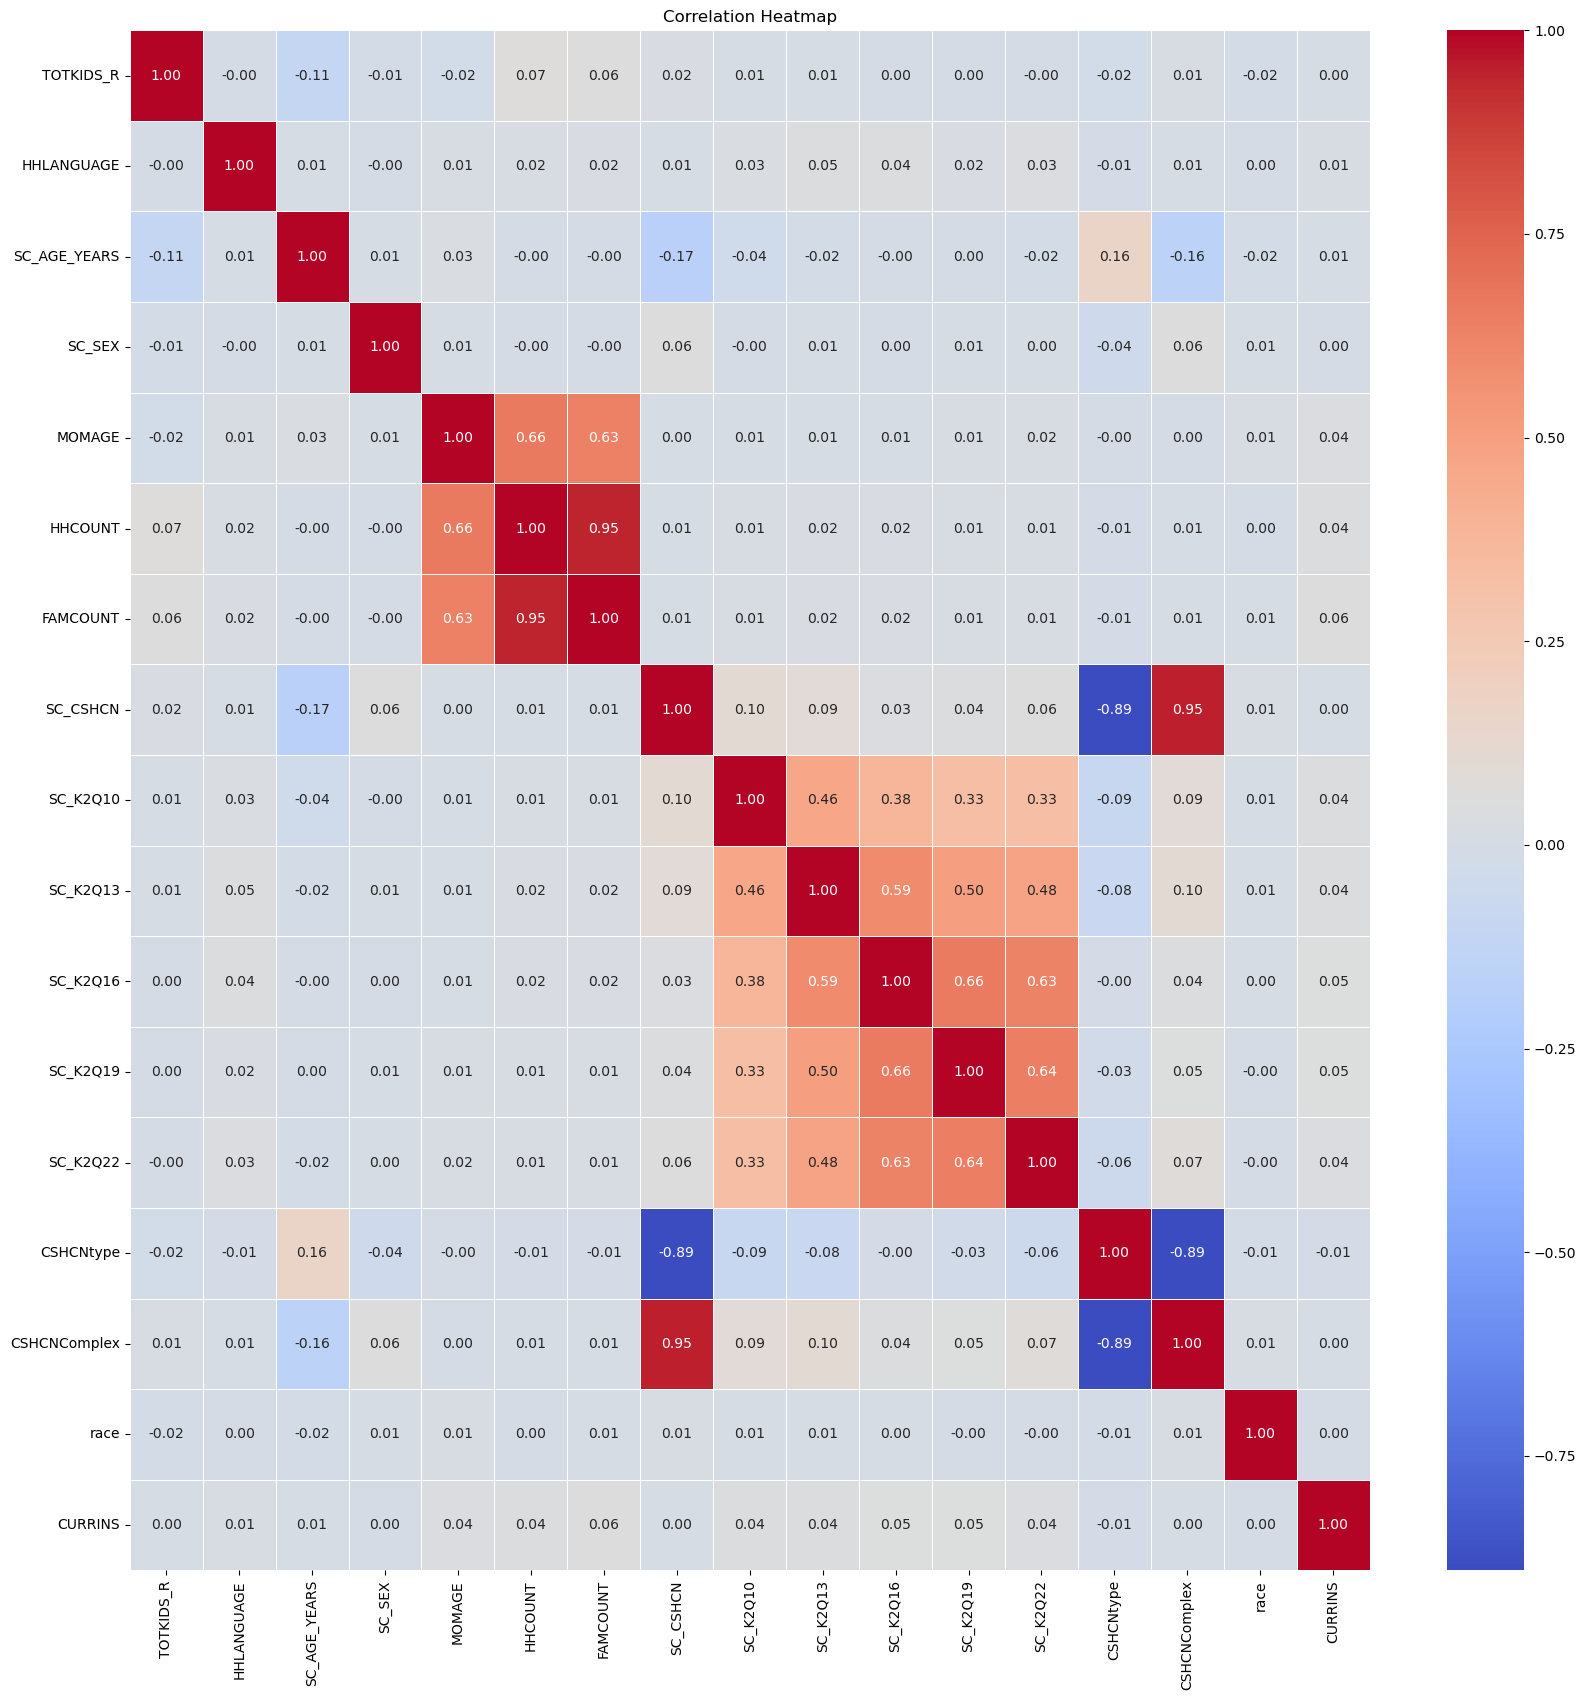

In [11]:
# Check the count of 95 in each column
count_95_per_column = df.eq(95).sum()

# Display the results only for columns with count greater than 0
columns_with_95 = count_95_per_column[count_95_per_column > 0]
if not columns_with_95.empty:
    print("Columns with count of 95:")
    print(columns_with_95)
else:
    print("No columns have a count of 95.")
    

# Ploting histogram to check that if data columns are normal or almost normal or not
df.hist(figsize=(24,20),color="blueviolet",grid=False)
plt.show()

#Heat map again with final list of columns

cormat=df.corr(numeric_only=True)
# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(cormat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


###  Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:
#Store target column 
y = df['SC_CSHCN'] 

# Drop target column from df
X = df.drop(['SC_CSHCN', 'CSHCNtype', 'CSHCNComplex'], axis=1)  
print(X.shape, y.shape)

(50212, 14) (50212,)


In [13]:
# Splitting the data into test and training datasets with test size 30% and random state of 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35148, 14)
Number transactions y_train dataset:  (35148,)
Number transactions X_test dataset:  (15064, 14)
Number transactions y_test dataset:  (15064,)


### A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [18]:
target_dist = df['SC_CSHCN'].value_counts(normalize=True)
print(target_dist)
baseline_pred = [target_dist.index[0]] * len(df)
baseline_accuracy = accuracy_score(df['SC_CSHCN'], baseline_pred)
print("Baseline accuracy:", baseline_accuracy)

2    0.773122
1    0.226878
Name: SC_CSHCN, dtype: float64
Baseline accuracy: 0.7731219628773999


Accuracy of the basic logistic regression 0.9349442379182156

Classification report

              precision    recall  f1-score   support

           1       0.83      0.89      0.86      3332
           2       0.97      0.95      0.96     11732

    accuracy                           0.93     15064
   macro avg       0.90      0.92      0.91     15064
weighted avg       0.94      0.93      0.94     15064

Precision: 0.9370174674307997
Recall: 0.9349442379182156
F1 Score: 0.9357011445964558


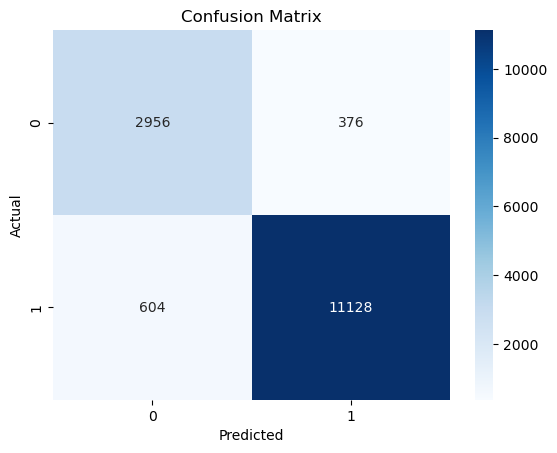

In [19]:
#Logistic regression - simple model

base_lr_model=LogisticRegression(max_iter=1000)

# Calculating the time
start_time = time.time()
base_lr_model.fit(X_train,y_train)
train_time = time.time() - start_time

# Predictions and accuracy score
y_pred=base_lr_model.predict(X_test)
train_acc = base_lr_model.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)

print("Accuracy of the basic logistic regression" ,accuracy_score(y_test,y_pred))


# Create the confusion matrix heatmap
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

print("\nClassification report\n")
print(classification_report(y_test,y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


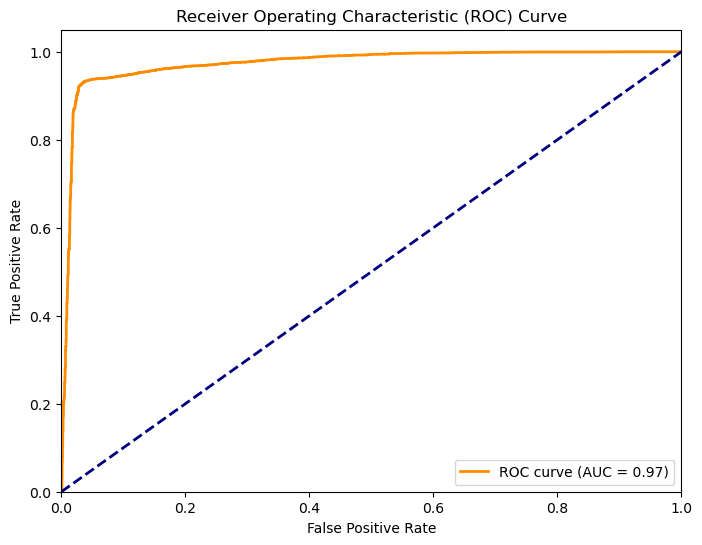

Accuracy of the basic logistic regression 0.9349442379182156


In [21]:
y_true_binary = np.where(y_test == 2, 1, 0)

y_prob = base_lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob)
auc = roc_auc_score(y_true_binary, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy of the basic logistic regression" ,accuracy_score(y_test,y_pred))

### Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
# Calculating the Test and Train accuracy of classification models with default settings

results = pd.DataFrame(columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])

#Appending the Logistis regression results
results = results.append({"Model": "Logistic Regression", "Train Time": train_time, "Train Accuracy": train_acc, "Test Accuracy": test_acc}, ignore_index=True)

# K-Nearest Neighbors (KNN) with time and accuracy calculations

knn_model = KNeighborsClassifier()
start_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time
y_pred = knn_model.predict(X_test)
train_acc = knn_model.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
results = results.append({"Model": "KNN", "Train Time": train_time, "Train Accuracy": train_acc, "Test Accuracy": test_acc}, ignore_index=True)

# Decision Tree with time and accuracy calculations

dt_model = DecisionTreeClassifier()
start_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_time
y_pred = dt_model.predict(X_test)
train_acc = dt_model.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
results = results.append({"Model": "Decision Tree", "Train Time": train_time, "Train Accuracy": train_acc, "Test Accuracy": test_acc}, ignore_index=True)

# Support Vector Machine (SVM) with time and accuracy calculations

svm_model = SVC()
start_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_time
y_pred = svm_model.predict(X_test)
train_acc = svm_model.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
results = results.append({"Model": "SVM", "Train Time": train_time, "Train Accuracy": train_acc, "Test Accuracy": test_acc}, ignore_index=True)

print(results)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    1.321208        0.936326       0.934944
1                  KNN    0.169096        0.917150       0.889339
2        Decision Tree    0.100067        0.991578       0.927111
3                  SVM   44.401184        0.926966       0.924057


### Summary of Basic Model comparisons

**Model Performance:**

* The Decision Tree model achieved the highest training accuracy of 99.16%, indicating strong performance on the training dataset.
* Logistic Regression also performed well with high accuracy on both the training and test datasets.

**Training Time:**

* Logistic Regression and K-Nearest Neighbors (KNN) have very low training times, suggesting they are computationally efficient.
* SVM has a significantly higher training time, indicating a longer time required for model training.

**Accuracy:**

* Logistic Regression and Decision Tree models show similar high accuracy on both training and test datasets.
* KNN's test accuracy is slightly lower than its training accuracy, indicating a potential risk of overfitting.
* SVM has a relatively high accuracy, but the training time is substantially higher compared to other models.

**Considerations:**

* Depending on the specific requirements, trade-offs between model accuracy and training time may need to be considered.
* Decision Tree appears promising with high accuracy, but further evaluation on unseen data is necessary to assess its generalization capability.
* The choice of the model may depend on the application's sensitivity to training time and the desired balance between speed and accuracy.

In summary, the Decision Tree and Logistic Regression models seem promising, each with its own strengths. Consideration should be given to the specific needs of the application, including the trade-off between accuracy and training time.

### Understanding what features contributing to the Model prediction

In [23]:
# Hyperparameter tuning for Logistic Regression
lr_model = LogisticRegression()
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization parameter
    'max_iter': [500, 1000],  # Maximum number of iterations
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding scores
print("Best Hyperparameters:", lr_grid_search.best_params_)
print("Best Score:", lr_grid_search.best_score_)

Best Hyperparameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9351312941083142


In [24]:
accuracy_test = lr_grid_search.score(X_test, y_test)
print("Accuracy on Test Set for logistic regression:", accuracy_test)

Accuracy on Test Set for logistic regression: 0.9345459373340415


In [25]:
# Get feature coefficients for linear regression
# Get the best model
best_lr_model = lr_grid_search.best_estimator_
feature_coefficients = best_lr_model.coef_[0]

# Get the feature names from the feature matrix 'X'
feature_names = X.columns

# Create a DataFrame to display feature names and coefficients
feature_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})

# Calculate the absolute values of the coefficients
feature_coef_df['Absolute_Coefficient'] = feature_coef_df['Coefficient'].abs()

# Sort the DataFrame by coefficient values (e.g., in descending order)
feature_coef_df = feature_coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the DataFrame
print(feature_coef_df)

         Feature  Coefficient  Absolute_Coefficient
7       SC_K2Q10     3.813769              3.813769
8       SC_K2Q13     3.126394              3.126394
11      SC_K2Q22     0.809958              0.809958
3         SC_SEX     0.283347              0.283347
0      TOTKIDS_R    -0.148502              0.148502
2   SC_AGE_YEARS    -0.045692              0.045692
10      SC_K2Q19     0.038326              0.038326
9       SC_K2Q16    -0.016627              0.016627
1     HHLANGUAGE     0.006601              0.006601
6       FAMCOUNT     0.004743              0.004743
5        HHCOUNT    -0.003984              0.003984
13       CURRINS     0.003738              0.003738
4         MOMAGE     0.001055              0.001055
12          race     0.000947              0.000947


In [27]:
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': range(1, 15),  # Number of neighbors
     'weights': ['uniform', 'distance'],
}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print("K-Nearest Neighbors - Best Hyperparameters:", knn_grid_search.best_params_)
print("K-Nearest Neighbors - Best Score:", knn_grid_search.best_score_)

K-Nearest Neighbors - Best Hyperparameters: {'n_neighbors': 4, 'weights': 'uniform'}
K-Nearest Neighbors - Best Score: 0.8963810889533648


In [28]:
knn_accuracy_test = knn_grid_search.score(X_test, y_test)
print("Accuracy on Test Set for K-Nearest Neighbors:", knn_accuracy_test)

Accuracy on Test Set for K-Nearest Neighbors: 0.9022835900159321


In [29]:
results = permutation_importance(knn_grid_search.best_estimator_, X_test, y_test, n_repeats=10, random_state=0)
importance = results.importances_mean

# Create a DataFrame with feature names and their permutation importances
permutation_importance_df = pd.DataFrame({'Feature': feature_names, 'Permutation_Importance': importance})
# Calculate the absolute values of the coefficients
permutation_importance_df['Absolute_Importance'] = permutation_importance_df['Permutation_Importance'].abs()
# Sort the DataFrame by permutation importances in descending order
permutation_importance_df = permutation_importance_df.sort_values(by='Absolute_Importance', ascending=False)
print(permutation_importance_df)

         Feature  Permutation_Importance  Absolute_Importance
7       SC_K2Q10                0.117140             0.117140
8       SC_K2Q13                0.023294             0.023294
5        HHCOUNT                0.018255             0.018255
2   SC_AGE_YEARS                0.014432             0.014432
11      SC_K2Q22                0.013522             0.013522
6       FAMCOUNT                0.008869             0.008869
4         MOMAGE                0.007256             0.007256
9       SC_K2Q16                0.005118             0.005118
10      SC_K2Q19                0.004667             0.004667
0      TOTKIDS_R                0.002854             0.002854
1     HHLANGUAGE                0.002304             0.002304
12          race                0.001540             0.001540
3         SC_SEX                0.001215             0.001215
13       CURRINS                0.000179             0.000179


In [15]:
# Hyperparameter tuning for Support Vector Machine (SVM)
svm_model = SVC()
svm_param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

print("Support Vector Machine - Best Hyperparameters:", svm_grid_search.best_params_)
print("Support Vector Machine - Best Score:", svm_grid_search.best_score_)



Support Vector Machine - Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Support Vector Machine - Best Score: 0.9368953494231477


In [16]:
svm_accuracy_test = svm_grid_search.score(X_test, y_test)
print("Accuracy on Test Set for svm:", svm_accuracy_test)

Accuracy on Test Set for svm: 0.9366702071163038


In [31]:
# Hyperparameter tuning for Decision Tree
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': range(1, 10), 
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

print("Decision Tree - Best Hyperparameters:", dt_grid_search.best_params_)
print("Decision Tree - Best Score:", dt_grid_search.best_score_)

Decision Tree - Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree - Best Score: 0.9489302780777947


In [32]:
decision_accuracy_test = dt_grid_search.score(X_test, y_test)
print("Accuracy on Test Set for decision tree:", decision_accuracy_test)

Accuracy on Test Set for decision tree: 0.945432819968136


In [33]:
importances = dt_grid_search.best_estimator_.feature_importances_

# Create a DataFrame with feature names and their permutation importances
permutation_importance_df = pd.DataFrame({'Feature': feature_names, 'Permutation_Importance': importances})
# Calculate the absolute values of the coefficients
permutation_importance_df['Absolute_Importance'] = permutation_importance_df['Permutation_Importance'].abs()
# Sort the DataFrame by permutation importances in descending order
permutation_importance_df = permutation_importance_df.sort_values(by='Absolute_Importance', ascending=False)
print(permutation_importance_df)

         Feature  Permutation_Importance  Absolute_Importance
7       SC_K2Q10                0.717427             0.717427
11      SC_K2Q22                0.167411             0.167411
8       SC_K2Q13                0.075588             0.075588
9       SC_K2Q16                0.015330             0.015330
2   SC_AGE_YEARS                0.011022             0.011022
10      SC_K2Q19                0.004499             0.004499
0      TOTKIDS_R                0.002900             0.002900
4         MOMAGE                0.001664             0.001664
3         SC_SEX                0.001014             0.001014
6       FAMCOUNT                0.000901             0.000901
1     HHLANGUAGE                0.000779             0.000779
5        HHCOUNT                0.000763             0.000763
13       CURRINS                0.000408             0.000408
12          race                0.000294             0.000294


### Summary of the Model comparisons with Hyperparameters


**Logistic Regression:**
- Best Hyperparameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
- Best Train Score: 0.9351312941083142
- Best Test Score: 0.9345459373340415
- Top Features: 'SC_K2Q10' (3.813769), 'SC_K2Q13' (3.126394), 'SC_K2Q22' (0.809958), 'SC_SEX' (0.283347), 'TOTKIDS_R' (-0.148502)

**K-Nearest Neighbors (KNN):**
- Best Hyperparameters: {'n_neighbors': 4, 'weights': 'uniform'}
- Best Train Score: 0.8963810889533648
- Best Test Score: 0.9022835900159321
- Top Features: 'SC_K2Q10' (0.117140), 'SC_K2Q13' (0.023294), 'HHCOUNT' (0.018255), 'SC_AGE_YEARS' (0.014432), 'SC_K2Q22' (0.013522)

**Support Vector Machine (SVM):**
- Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
- Best Train Score: 0.9368953494231477
- Best Test Score: 0.9366702071163038

**Decision Tree:**
- Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
- Best Train Score: 0.9489302780777947
- Best Test Score: 0.945432819968136
- Top Features: 'SC_K2Q10' (0.717427), 'SC_K2Q22' (0.167411), 'SC_K2Q13' (0.075588), 'SC_K2Q16' (0.015330), 'SC_AGE_YEARS' (0.011022)

**Observations:** 

1. Logistic Regression:

* Achieved a high train and test score, indicating good generalization.
* Top features include 'SC_K2Q10' and 'SC_K2Q13,' which seem to have a significant impact.

2. K-Nearest Neighbors (KNN):

* Moderate performance with slightly lower scores compared to logistic regression.
* Notable features include 'SC_K2Q10' and 'SC_K2Q13.'

3. Support Vector Machine (SVM):

* Demonstrates high train and test scores, suggesting robust performance.
* Utilizes linear kernel with 'C' value of 0.1.

4. Decision Tree:

* Excellent performance on both train and test sets, with a high test score.
* Key features include 'SC_K2Q10' and 'SC_K2Q22.'

**Recommendations:**

1. Model Selection:

The Decision Tree model seems to perform exceptionally well. Consider it as a strong candidate for the final model.

2. Feature Importance:

'SC_K2Q10' is consistently an important feature across all models. Further investigate its significance and potential impact on predictions.

3. Fine-Tuning:

Fine-tune hyperparameters of the selected model(s) to see if further improvements can be achieved. For instance, try adjusting the depth of the Decision Tree or the 'C' value in SVM.

4. Validation:

Validate the model(s) on an independent dataset to ensure the generalization of performance and to avoid overfitting.
